In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt

In [80]:
path = '/Users/shubhamkapadnis/Downloads/Online Retail.csv'

In [117]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [83]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [84]:
df.duplicated().sum()

5268

In [85]:
df.drop_duplicates(inplace= True)

In [86]:
df.dropna(subset= ['CustomerID'],inplace= True)

In [87]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [88]:
df.shape

(401604, 8)

In [118]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [119]:
df.shape

(541909, 8)

In [120]:
#dropping the cancel order as they don't contribute to the revenue
df = df[~df['InvoiceNo'].str.startswith('C')]

In [121]:
df.shape

(532621, 8)

In [122]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [95]:
#now in the quantity there are no negative values

In [123]:
df[df['UnitPrice'] == 0].shape
#some of the invoice has zero as the unit price so dropping those rows as they don't contribute to the final outcome

(2515, 8)

In [124]:
df = df[df['UnitPrice'] > 0]

In [125]:
df.shape

(530104, 8)

In [126]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format= '%m/%d/%y %H:%M')
df['day'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day_num'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)
df['month'] = df['InvoiceDate'].dt.month_name()
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [127]:
desc_df = df['Description'].value_counts().reset_index()

In [128]:
desc_df.rename(columns={'index':'Description Name','Description':'Count'},inplace=True)

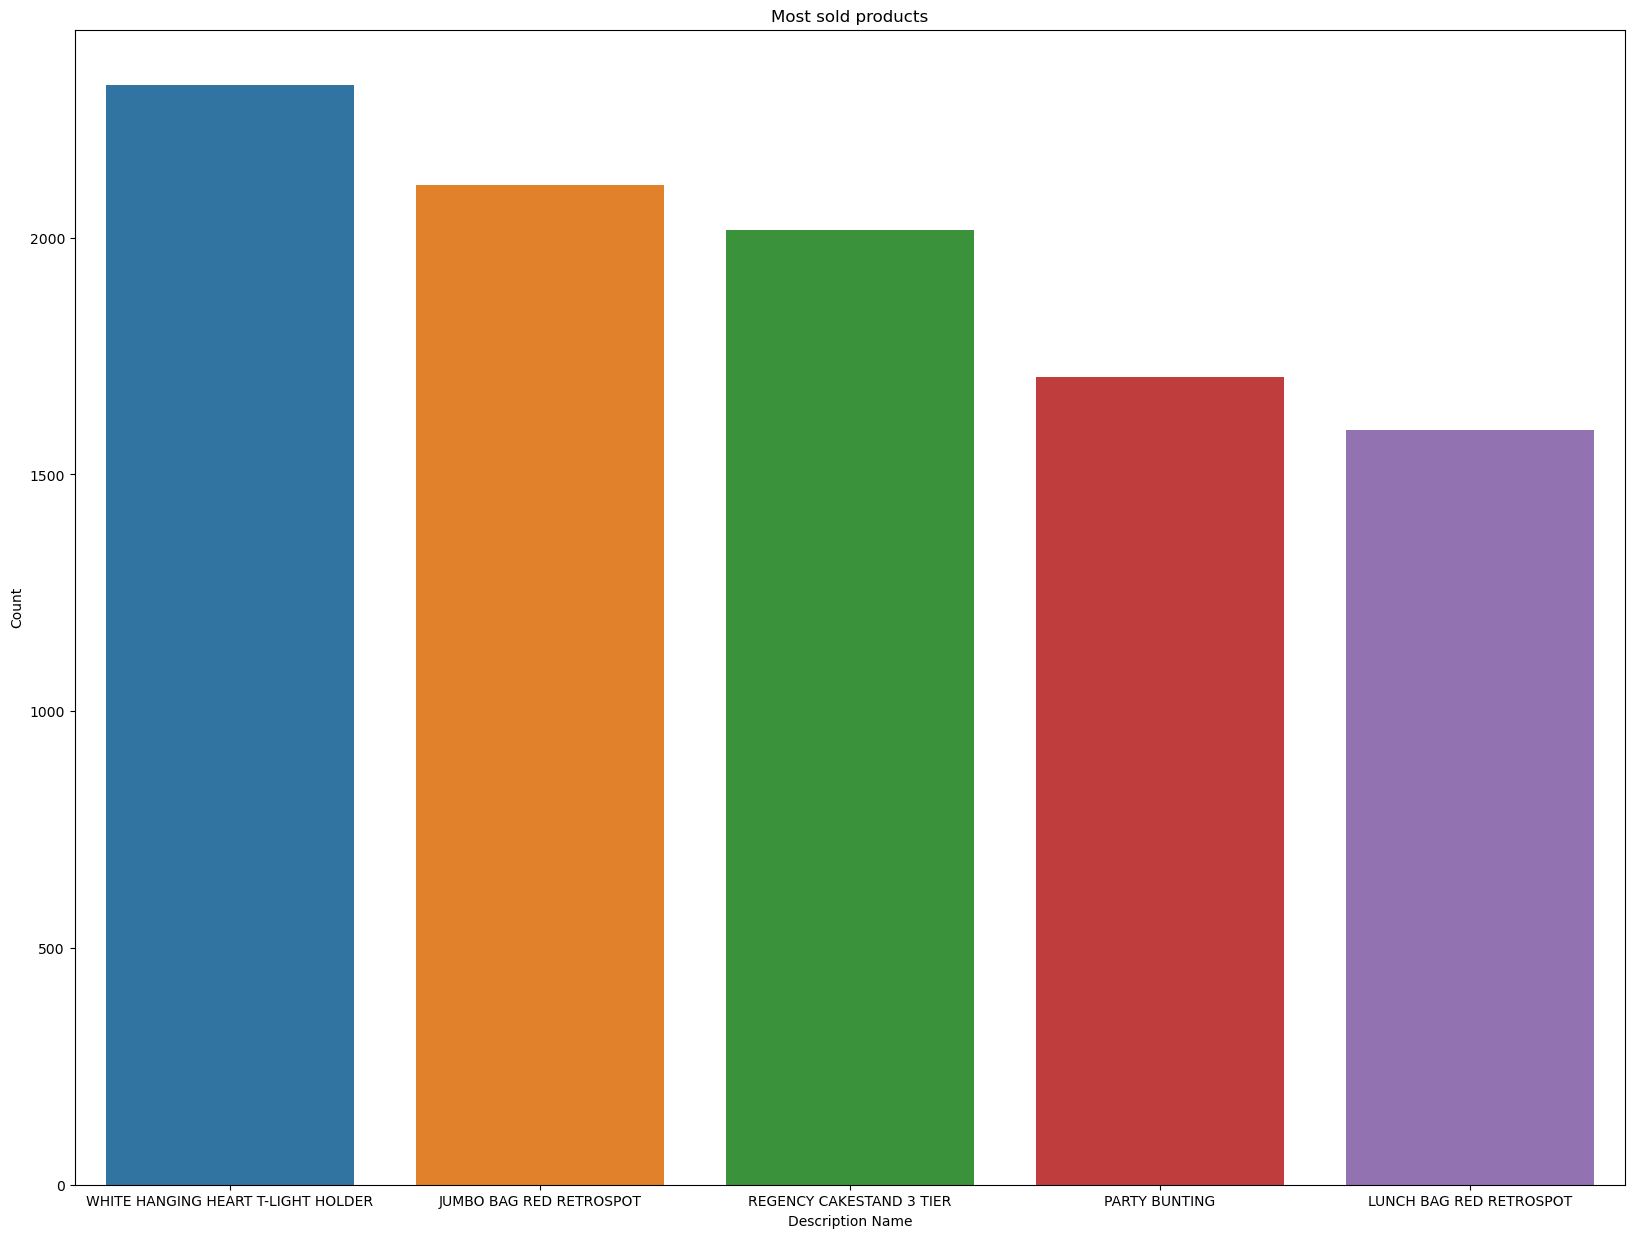

In [129]:
plt.figure(figsize=(20,15))
sns.barplot(x='Description Name',y= 'Count',data= desc_df[:5])
plt.title('Most sold products')
plt.show()

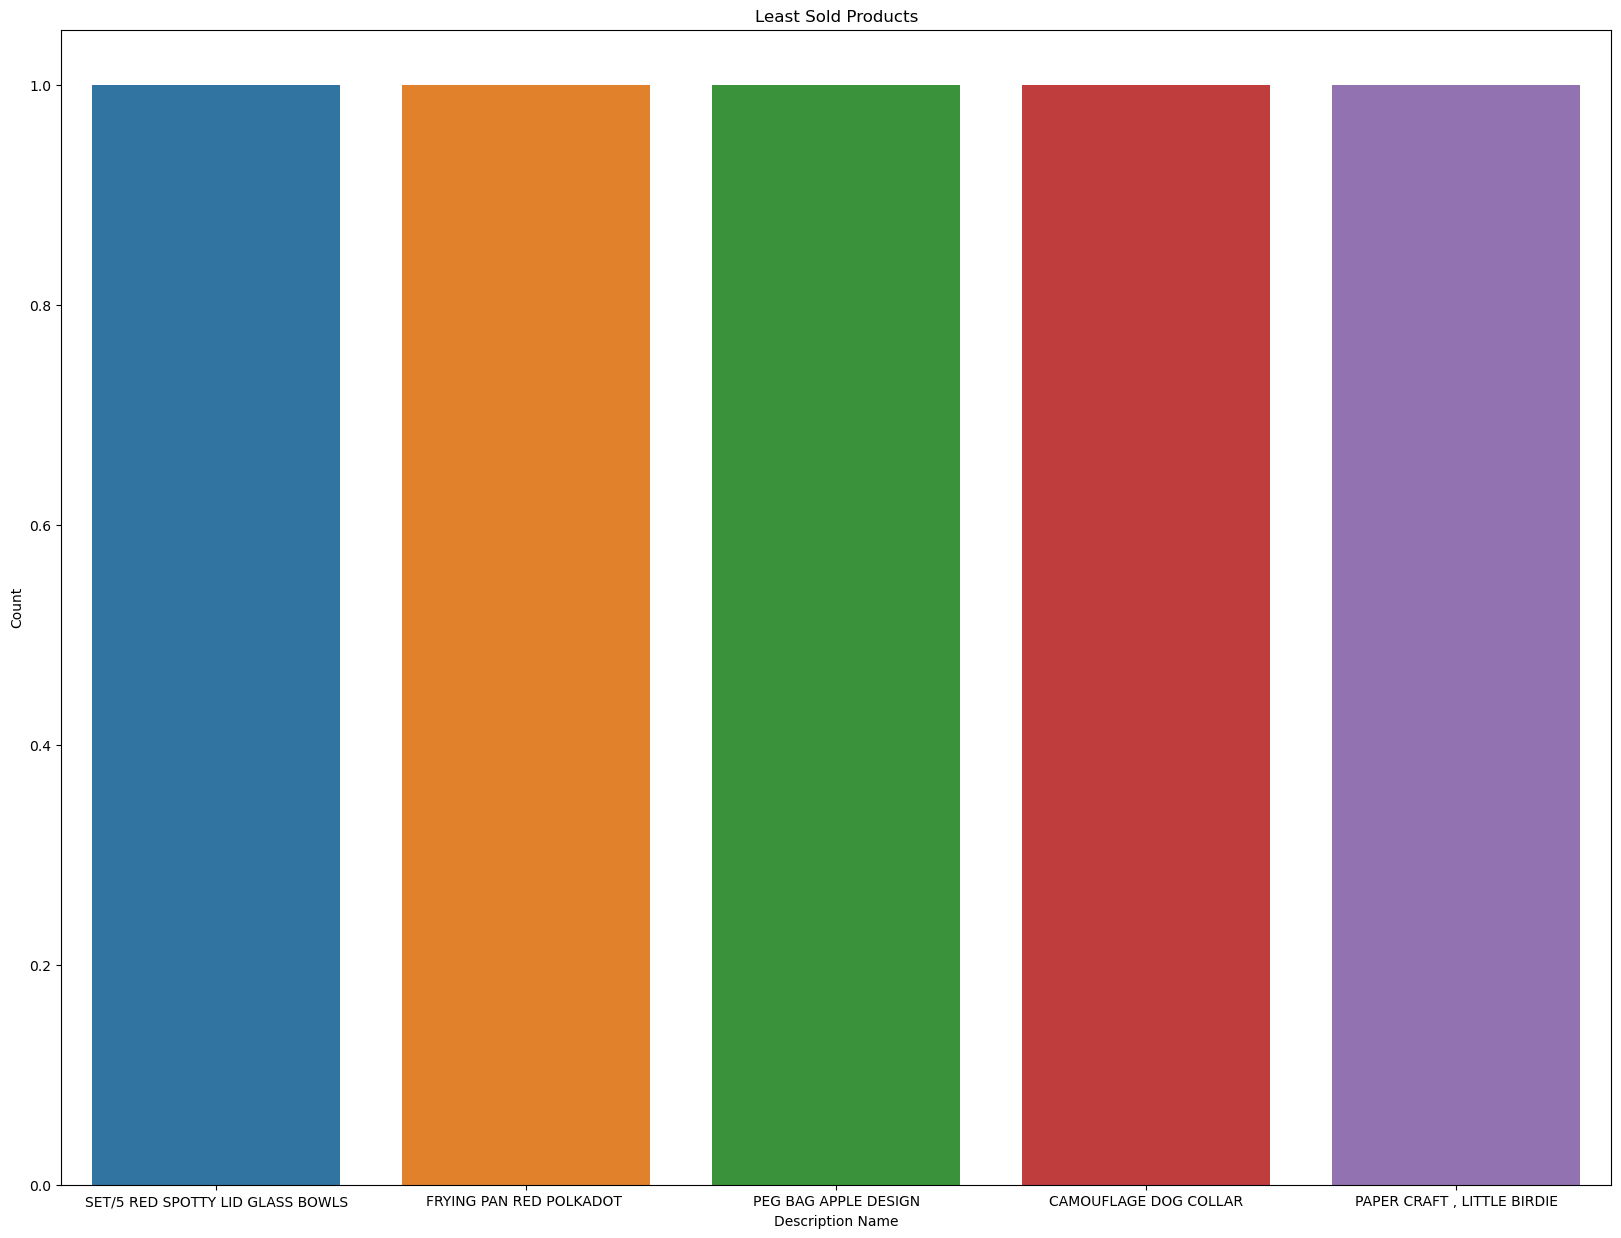

In [130]:
plt.figure(figsize=(20,15))
sns.barplot(x='Description Name',y='Count',data= desc_df[-5:])
plt.title('Least Sold Products')
plt.show()

In [131]:
df.groupby('Country')['CustomerID'].count()

Country
Australia                 1182
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7236
European Community          60
Finland                    685
France                    8341
Germany                   9040
Greece                     145
Hong Kong                    0
Iceland                    182
Israel                     248
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1462
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2484


In [132]:
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country','Country':'Count'},inplace=True)

<Axes: xlabel='Country', ylabel='Count'>

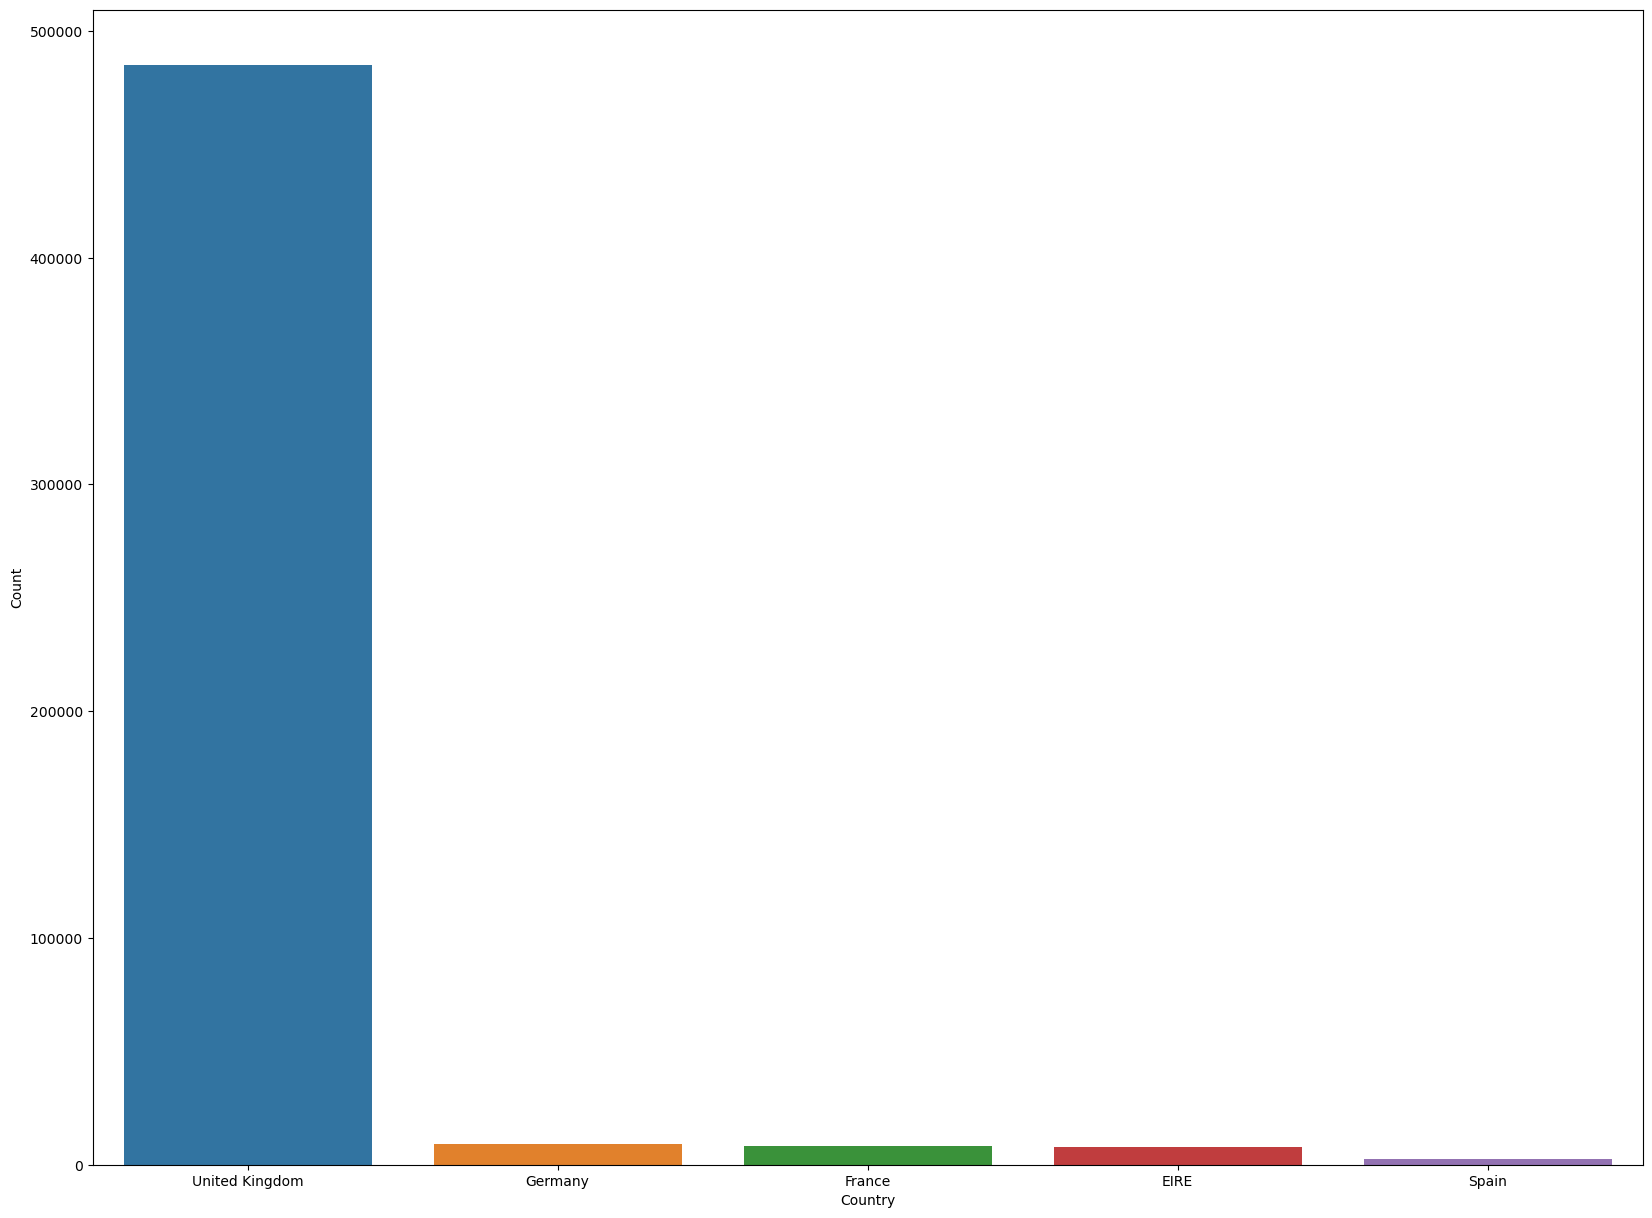

In [133]:
plt.figure(figsize=(20,15))
sns.barplot(x= 'Country',y= 'Count',data= country_df[:5])

In [134]:
share_df = (df['CustomerID'].value_counts()/(df['CustomerID'].count())*100).reset_index()
share_df.columns=['CustomerID','Order Share']

<Axes: xlabel='CustomerID', ylabel='Order Share'>

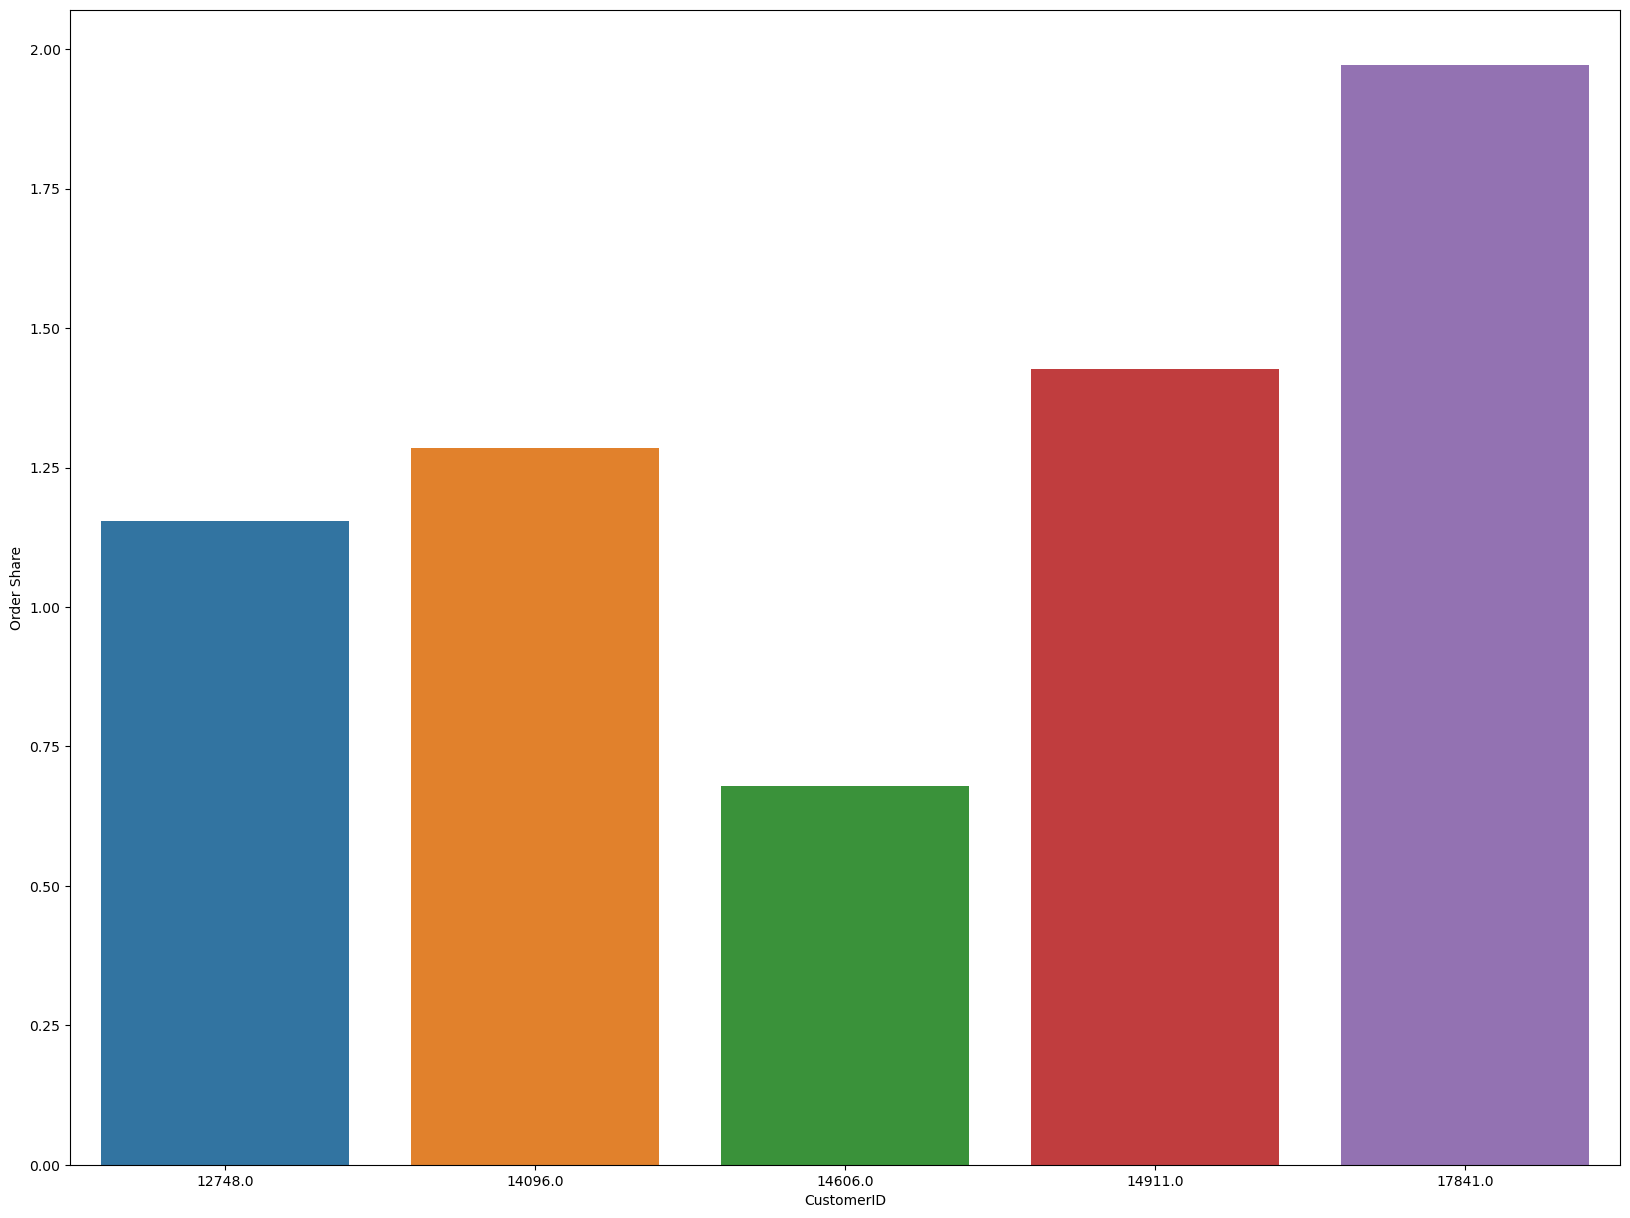

In [135]:
plt.figure(figsize=(20,15))
sns.barplot(x= 'CustomerID',y= 'Order Share',data= share_df[:5])


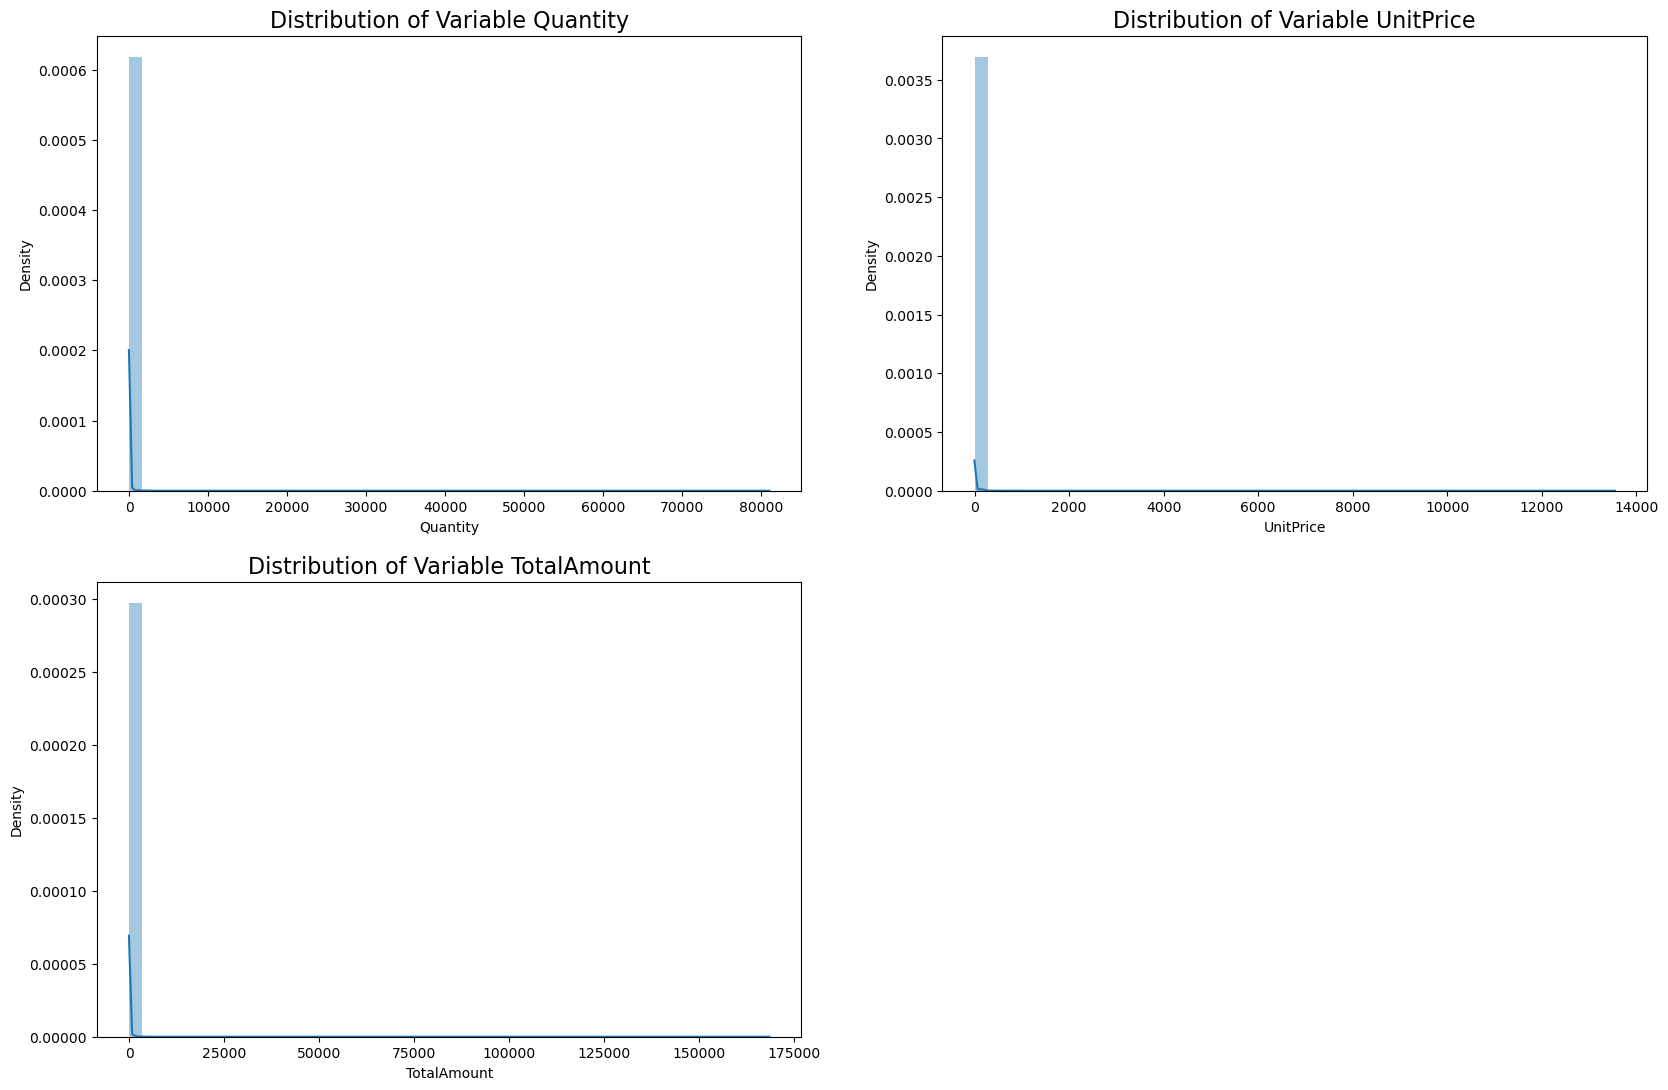

In [136]:
num_features = ['Quantity','UnitPrice','TotalAmount']
count = 1
plt.subplots(figsize= (20,13))
for i in num_features:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    plt.title(f"Distribution of Variable {i}", fontsize= 16)
    plt.xlabel(f"{i}")
    plt.ylabel("Density")
    count +=1
    
    
    
    

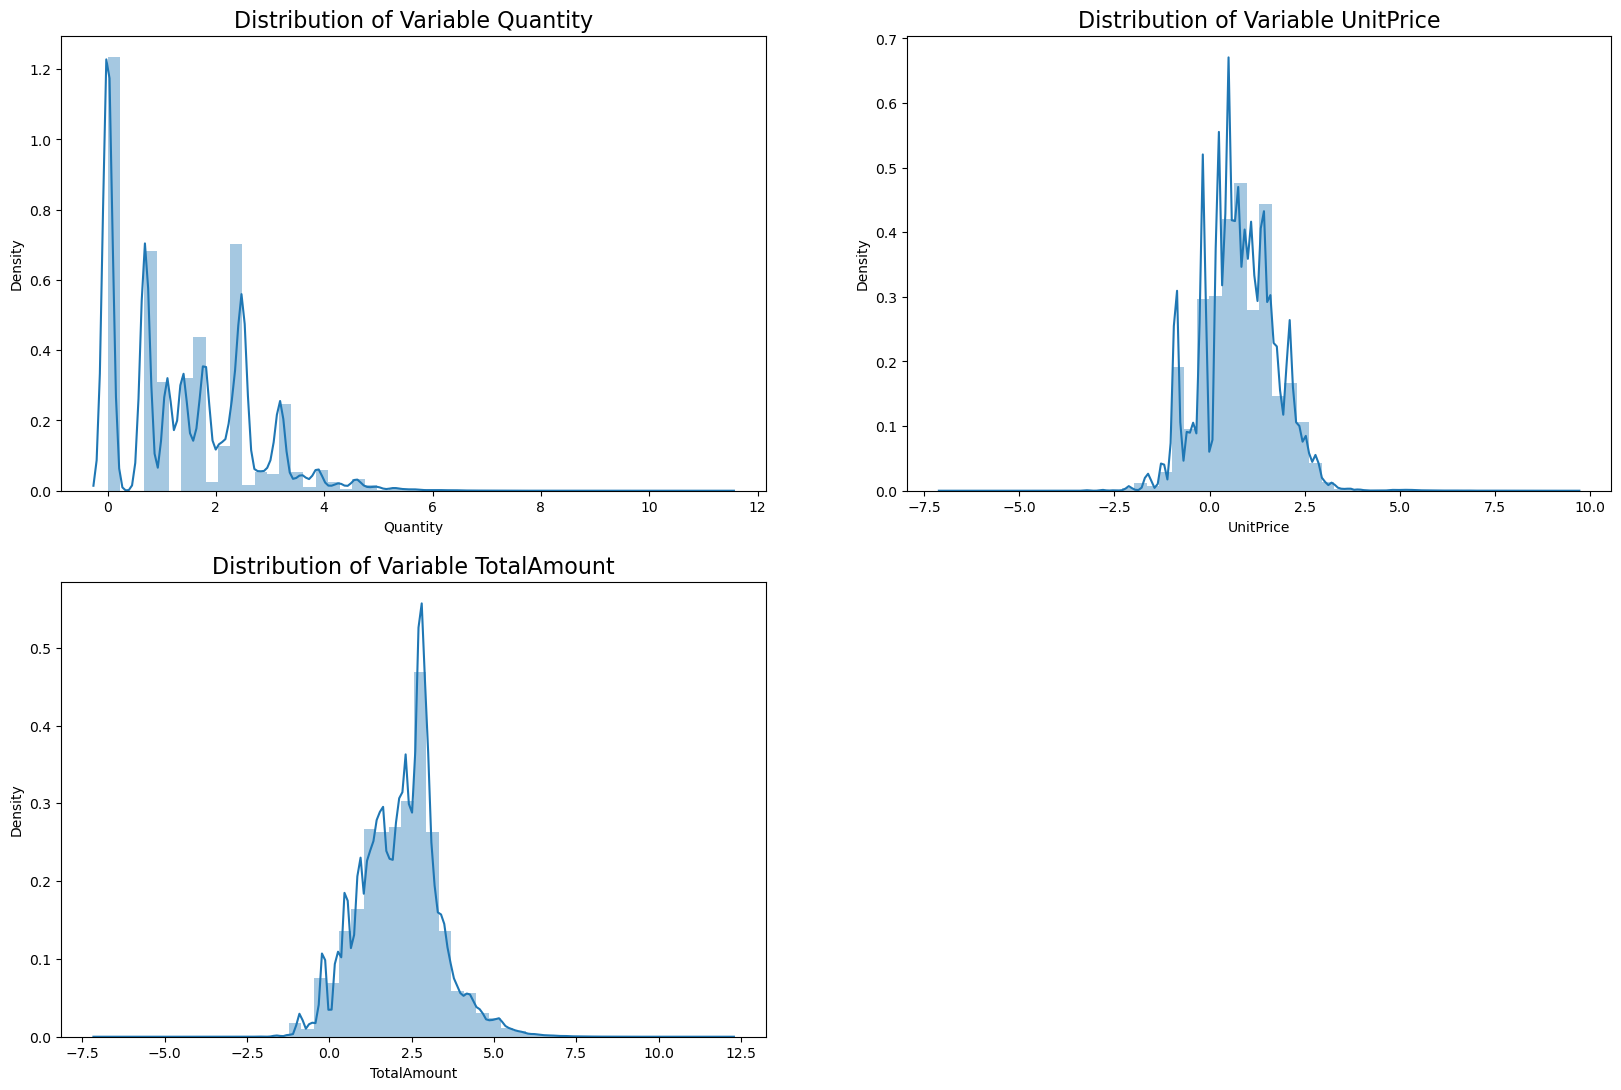

In [137]:
count = 1
plt.subplots(figsize= (20,13))
for i in num_features:
    plt.subplot(2,2,count)
    sns.distplot(np.log(df[i]))
    plt.title(f"Distribution of Variable {i}", fontsize= 16)
    plt.xlabel(f"{i}")
    plt.ylabel("Density")
    count +=1    

<Axes: xlabel='Day Name', ylabel='Count'>

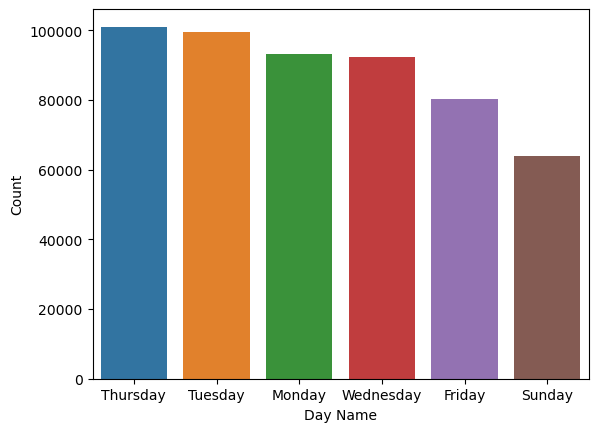

In [138]:
day_df = df['day'].value_counts().reset_index()
day_df.columns=['Day Name','Count']
sns.barplot(x='Day Name',y= 'Count',data= day_df)

<Axes: xlabel='Month Name', ylabel='Count'>

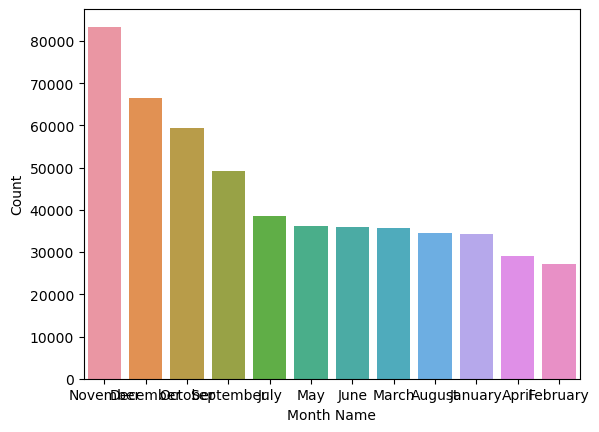

In [139]:
month_df = df['month'].value_counts().reset_index()
month_df.columns=['Month Name','Count']
sns.barplot(x='Month Name',y= 'Count',data= month_df)

<Axes: xlabel='Hour', ylabel='Count'>

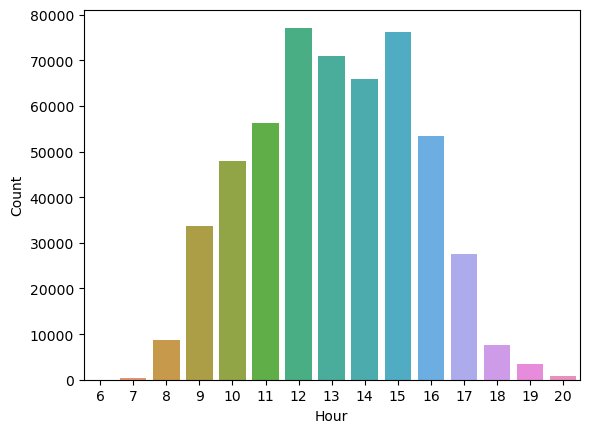

In [140]:
hour_df = df['hour'].value_counts().reset_index()
hour_df.columns=['Hour','Count']
sns.barplot(x='Hour',y= 'Count',data= hour_df)

In [141]:
df= df[df['Country'] == 'United Kingdom']
df.shape

(485123, 16)

In [142]:
latest_date = pd.datetime(2011,12,10)
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate':lambda x: (latest_date- x.max()).days,'InvoiceNo':lambda x: x.count(),
                                      'TotalAmount':lambda x: x.sum()})
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype('int')
rfm_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency', 'TotalAmount': 'Monetary'},inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [143]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,91.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,0.000000,1.000000,3.750000
25%,17.000000,17.000000,300.280000
50%,50.000000,41.000000,652.280000
75%,142.000000,99.250000,1576.585000
max,373.000000,7847.000000,259657.300000


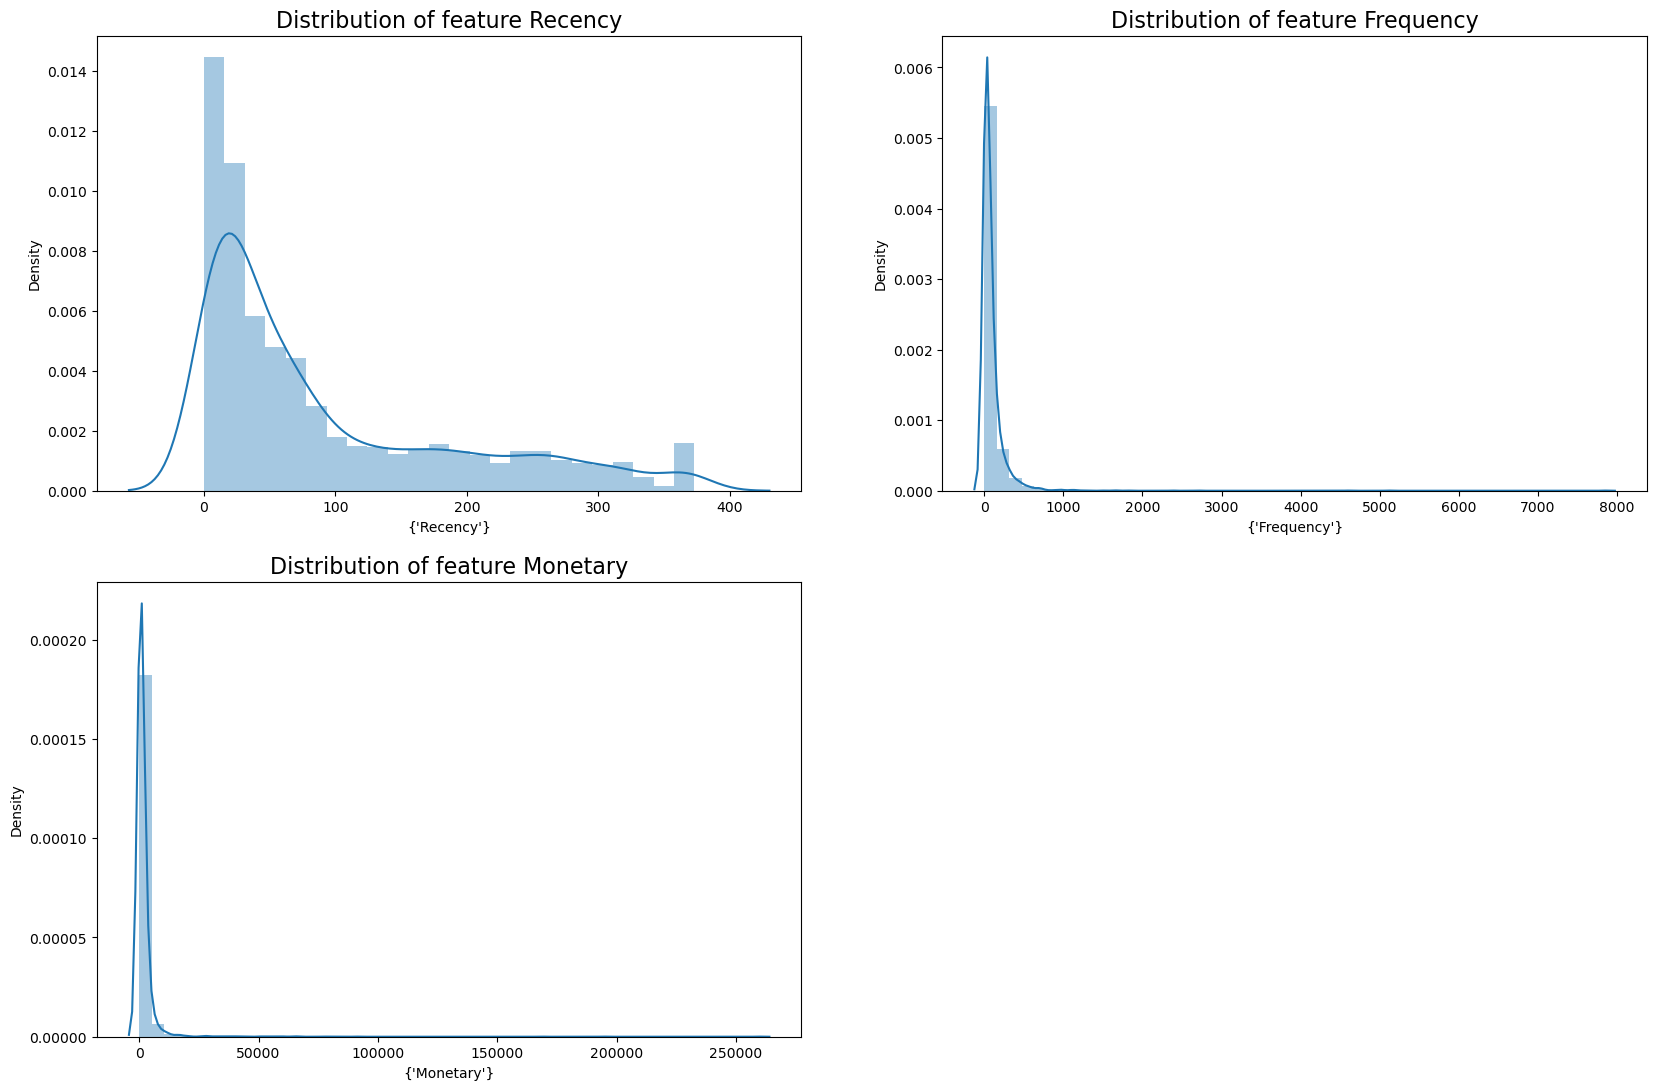

In [145]:
count = 1
plt.subplots(figsize= (20,13))
for feature in rfm_df:
    plt.subplot(2,2,count)
    sns.distplot(rfm_df[feature])
    plt.title(f'Distribution of feature {feature}', fontsize = 16)
    plt.xlabel({feature})
    plt.ylabel('Density')
    count += 1

In [146]:
def handle_negative(num):
    if num <= 0:
        return 1
    else:
        return num
rfm_df['Recency_log'] = [handle_negative(x) for x in rfm_df['Recency']]

rfm_df['Frequency_log'] = [handle_negative(x) for x in rfm_df['Frequency']]

rfm_df['Monetary_log'] = [handle_negative(x) for x in rfm_df['Monetary']]


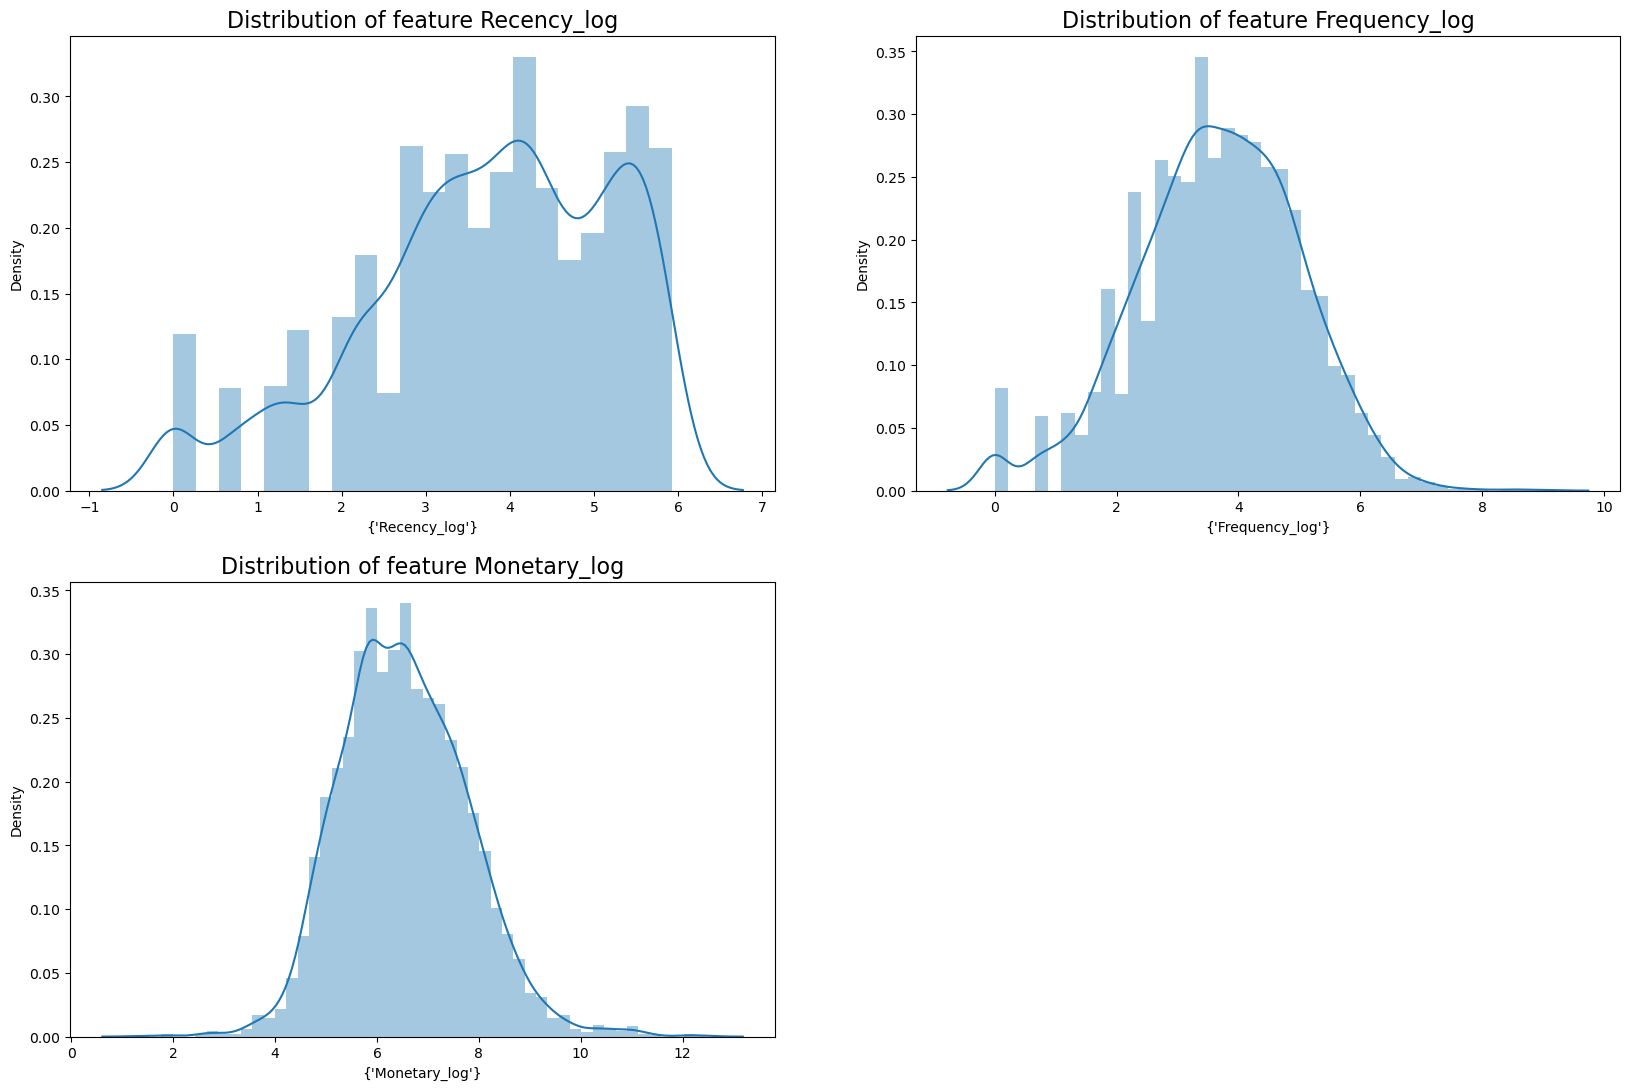

In [148]:
count = 1
plt.subplots(figsize= (20,13))
for feature in ['Recency_log','Frequency_log','Monetary_log']:
    plt.subplot(2,2,count)
    sns.distplot(np.log(rfm_df[feature]))
    plt.title(f'Distribution of feature {feature}', fontsize = 16)
    plt.xlabel({feature})
    plt.ylabel('Density')
    count += 1

In [149]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [150]:
pro_features = rfm_df.columns.tolist()

In [154]:
log_column = [col for col in pro_features if 'log' in col]

In [159]:
X_features = rfm_df[log_column].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

In [165]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.7 MB/s eta 0:00:0000:0100:01


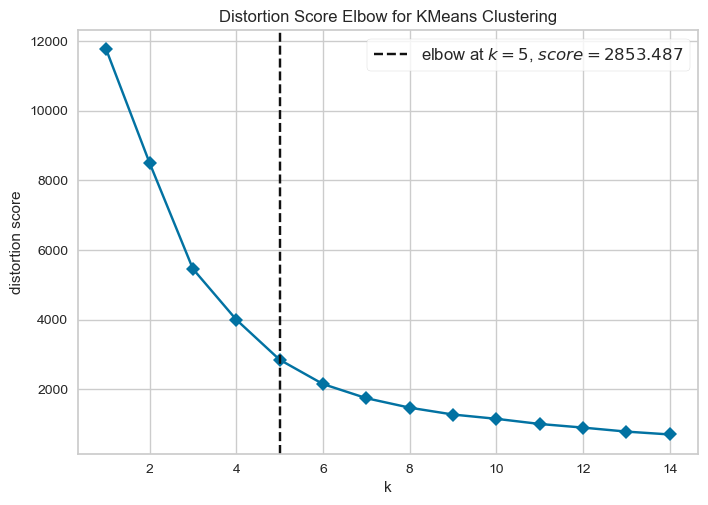

In [169]:
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    SSE[k] = km.inertia_
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

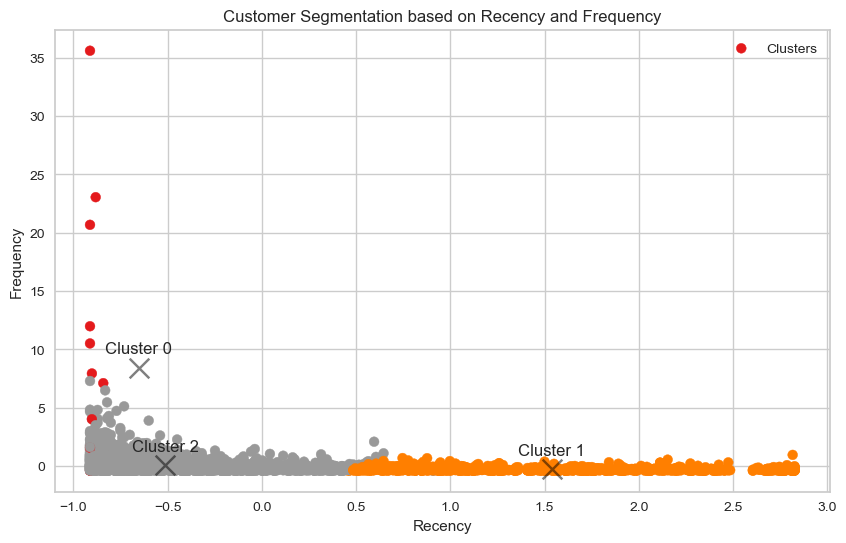

In [170]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X is your data array
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()